In [2]:
import pandas as pd
from datetime import datetime
import scipy.stats as ss
import seaborn as sns
from scipy import stats
import pingouin as pg
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
MultiComparison)
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm

Сперва загрузим данные

In [3]:
df1 = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-romanova-28/statistics/5_task_1.csv")

In [4]:
df1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


По каждой группе занесем данные в отдельные таблицы

In [5]:
df1_a = df1[df1.group=='A']
df1_b = df1[df1.group=='B']
df1_c = df1[df1.group=='C']

In [6]:
df1_a.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [7]:
df1_b.head()

,id,group,events
10000,4663,B,23
10001,14720,B,30
10002,12031,B,39
10003,11099,B,44
10004,9458,B,32


In [8]:
df1_c.head()

,id,group,events
20000,10715,C,48
20001,11041,C,24
20002,615,C,28
20003,15126,C,30
20004,7451,C,34


Проверим, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена

In [9]:
ss.levene(df1_a.events,df1_b.events,df1_c.events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [11]:
pg.homoscedasticity(df1, dv="events", group="group")

,W,pval,equal_var
levene,2.26226,0.104133,True


p-value > 0.05, не отклоняем нулевую гипотезу

Далее проверим нормальность распределения и сравним результат с qq-графиками

In [12]:
ss.normaltest(df1_a.events)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [13]:
ss.normaltest(df1_b.events)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [14]:
ss.normaltest(df1_c.events)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

In [16]:
pg.normality(df1, dv="events", group="group",method='normaltest')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


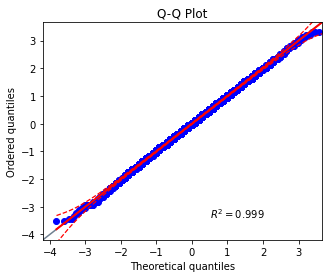

In [17]:
pg.qqplot(df1_a.events, dist='norm')

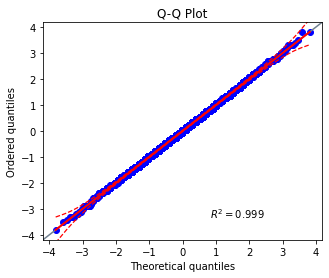

In [18]:
pg.qqplot(df1_b.events, dist='norm')

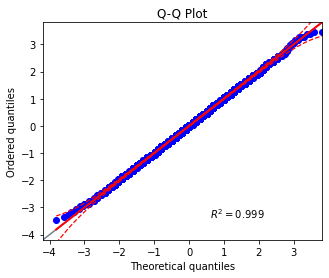

In [19]:
pg.qqplot(df1_c.events, dist='norm')

Делаем вывод, что распределение events во всех группах является нормальным

Для сравнения средних используем однофакторный дисперсионный анализ

In [21]:
pg.anova(df1, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [22]:
ss.f_oneway(df1_a.events,df1_b.events,df1_c.events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Теперь используем критерий Тьюки и определим, между какими группами есть статистически значимые различия. 

In [24]:
pg.pairwise_tukey(df1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [27]:
pairwise_tukeyhsd(df1.events, df1.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [29]:
MultiComparison(df1.events, df1.group).tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


Столбец meandiff отражает различие в средних между второй и первой группой, именно в таком порядке.

Дополнительно попробуем другие варианты поправок на множественные сравнения через pingouin

In [30]:
pg.pairwise_gameshowell(df1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140920,-57.011134,19987.258491,0.001,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.141696,14.886135,19995.116233,0.001,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140062,72.420220,19995.502469,0.001,1.024138


In [48]:
pg.pairwise_ttests(df1, dv='events', between='group', padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,2.250078e-49,bonf,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,1.024138


Делаем вывод, что в итоге будем использовать квадратные картинки (В)

Во второй части будем проверять как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

In [33]:
df2 = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-romanova-28/statistics/5_task_2.csv")

In [34]:
df2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


Посмотрим на данные. Для начала визуализируем распределение events для контрольной и тестовой групп

In [36]:
import warnings
warnings.filterwarnings('ignore')

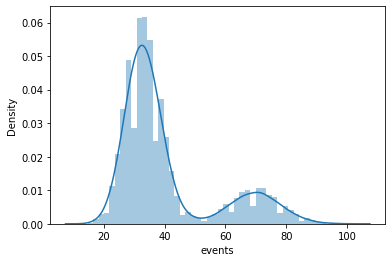

In [37]:
sns.distplot(df2[df2.group=='test'].events)

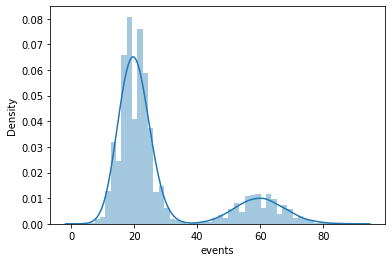

In [38]:
sns.distplot(df2[df2.group=='control'].events)

Посчитаем среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя

In [40]:
df2.groupby(['segment','group']).events.describe()

count       mean       std   min   25%   50%   75%    max
segment group                                                               
high    control  10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        test     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
low     control  40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
        test     40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

Проведем тест (через anova_lm и pg.anova), а затем используем критерий Тьюки, чтобы понять между какими группами есть 
статистически значимые различия

In [41]:
model = smf.ols('events ~ segment + group + segment:group', df2).fit()
anova_lm(model,typ = 2)

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [42]:
pg.anova(df2, dv='events', between=['segment','group'])

,Source,SS,DF,MS,F,p-unc,np2
0,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
1,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
2,segment * group,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


Для последующих сравнений между группами мсоединим колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey

In [43]:
df2['combination']=df2['group'] + ' / ' + df2['segment']

In [44]:
df2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high


In [45]:
pairwise_tukeyhsd(df2.events, df2.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control / high,control / low,-39.9392,0.001,-40.1073,-39.7711,True
control / high,test / high,9.9677,0.001,9.7551,10.1803,True
control / high,test / low,-26.9449,0.001,-27.113,-26.7768,True
control / low,test / high,49.9069,0.001,49.7388,50.075,True
control / low,test / low,12.9944,0.001,12.888,13.1007,True
test / high,test / low,-36.9126,0.001,-37.0807,-36.7445,True


In [46]:
pg.pairwise_tukey(df2, dv='events', between='combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control / high,control / low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control / high,test / high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control / high,test / low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control / low,test / high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control / low,test / low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test / high,test / low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


Смотрим на столбец reject. Если там стоит True - различия значимые.

Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13. Разница между control/high и test/high составила около 10

Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой

Визуализируем результаты теста

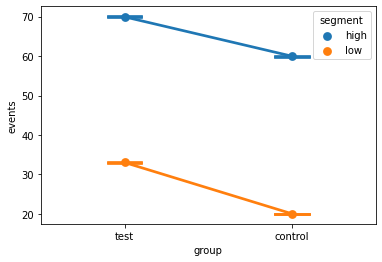

In [47]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = df2, capsize = .2)

Фактор group оказался значимым, фактор segment – значимым, их взаимодействие – значимым. 
Судя по графику, для всех групп среднее значение events увеличилось, поэтому решение: выкатываем новую версию
